In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json
import time
from pandas.io.json import json_normalize

In [2]:
#Get data from Alpha Vantage using API request

url = "https://www.alphavantage.co/query"
params = {
        "function": "TIME_SERIES_DAILY_ADJUSTED",
        "symbol": "CL",
        "outputsize": "full",
        "apikey": "ac9ba10aa04a7d"}



response = requests.get(url, params=params)
data = response.json()

def df_from_response(data,
         columns=['Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume']):

    def convert_response(d):
        # convert the response into datetimerecords that can be
        # parsed by Pandas
        for dt, prec in d['Time Series (Daily)'].items():
            r = { 'date': dt}
            r.update(prec)
            yield r
               
    # pass your response 'page'
    df = pd.DataFrame(convert_response(data))
    # rename the columns    
    df = df.rename(columns={'1. open': 'Open',
                            '2. high': 'High',
                            '3. low': 'Low',
                            '4. close': 'Close',
                            '5. adjusted close': 'AdjClose',
                            '6. volume': 'Volume'})
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df.sort_index(inplace=True)
    # extract the default columns
    df = df[columns]
    return df

df = df_from_response(data)
df.reset_index(level=0, inplace=True)
df.head()
# df = pd.DataFrame({'dates':pd.date_range('2018-01-01','2019-01-01')})
# newfd = df.columns = ['date' if x=='datetime' else x for x in df.columns]
# nf_h = pd.DataFrame(newfd)
# print('Data Frame:', nf_h)

,date,Open,High,Low,Close,AdjClose,Volume
0,1998-01-02,74.5000,74.5000,72.6900,73.2500,11.9706,451500
1,1998-01-05,74.0000,74.8800,73.2500,74.8800,12.2369,770000
2,1998-01-06,74.9400,74.9400,71.7500,71.9400,11.7565,861600
3,1998-01-07,70.2500,71.6300,69.8800,71.6300,11.7058,1125100
4,1998-01-08,71.6300,71.7500,69.3800,69.7500,11.3986,949700


In [3]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date        datetime64[ns]
Open                object
High                object
Low                 object
Close               object
AdjClose            object
Volume              object
dtype: object

In [4]:
df = df.set_index('date')
df.head(3)

,Open,High,Low,Close,AdjClose,Volume
date,,,,,,
1998-01-02,74.5000,74.5000,72.6900,73.2500,11.9706,451500
1998-01-05,74.0000,74.8800,73.2500,74.8800,12.2369,770000
1998-01-06,74.9400,74.9400,71.7500,71.9400,11.7565,861600


In [5]:
# Add columns with year, month, and weekday name
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] = df.index.weekday_name

# Display a random sampling of 5 rows
df.sample(5, random_state=0)

,Open,High,Low,Close,AdjClose,Volume,Year,Month,Weekday Name
date,,,,,,,,,
2001-06-04,57.5000,57.5800,56.5000,57.4600,19.5883,992300,2001,6,Monday
1998-03-05,79.0000,79.4400,78.6300,79.1900,12.9928,914900,1998,3,Thursday
2000-09-11,54.0000,55.0600,53.5600,55.0000,18.5878,1758300,2000,9,Monday
2017-08-28,71.2800,71.3300,70.6550,70.9000,68.3573,3086638,2017,8,Monday
2015-09-10,62.2800,62.4800,61.3100,61.9300,57.1031,5223877,2015,9,Thursday


In [6]:
import matplotlib.pyplot as plt

# Display figures inline in Jupyter notebook
%matplotlib inline

In [7]:
import seaborn as sns

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

In [8]:
#For the all the df column values to be used in the plots, we MUST convert them into numeric values first.
# the date was converted in datatime after creating the dataframe
df.Open=pd.to_numeric(df.Open)
df.High=pd.to_numeric(df.High)
df.Low=pd.to_numeric(df.Low)
df.Close=pd.to_numeric(df.Close)
df.AdjClose=pd.to_numeric(df.AdjClose)
df.Volume=pd.to_numeric(df.Volume)
df.Year=pd.to_numeric(df.Year)
df.Month=pd.to_numeric(df.Month)

#### Dot Plot - Crude Oil Stocks 2000-2019

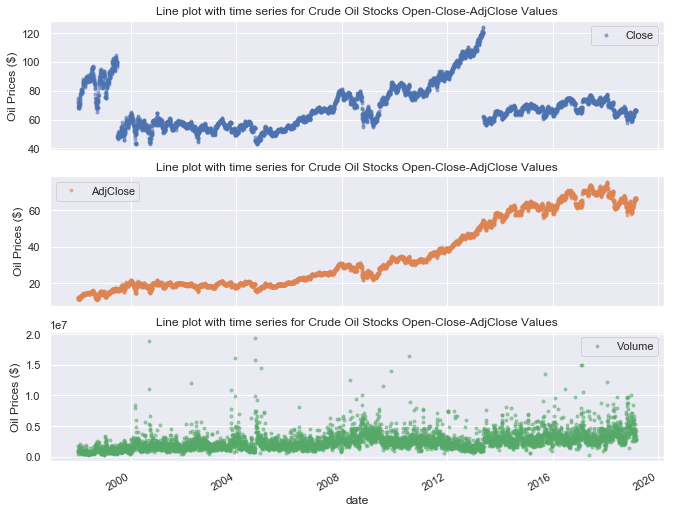

In [9]:
cols_plot = ['Close', 'AdjClose', 'Volume']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Oil Prices ($)')
    ax.set_title('Line plot with time series for Crude Oil Stocks Open-Close-AdjClose Values')

The 3 plots above provides with interesting patterns. Strong fluctuations of the prices troughout the years.Slight increases in volume as well.

## Weekly Line Plot - Crude Oil Stocks Comparison 07/00 - 09/00 & 07/01 - 09/01 

In [31]:
import matplotlib.dates as mdates

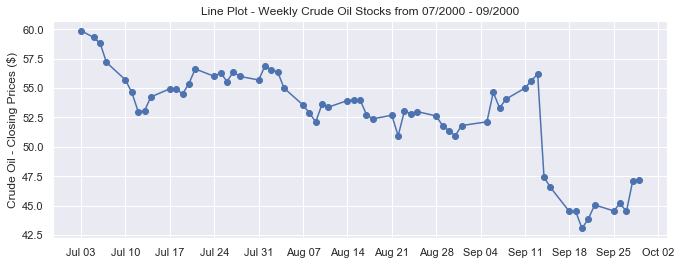

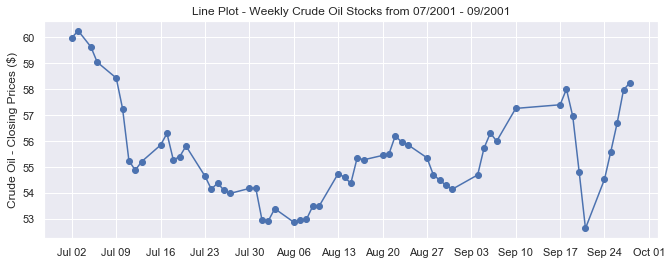

In [32]:
# Visually display side by side the two line plots

#Using the dataframes generated above we'll create a weekly line plot
fig, ax = plt.subplots()
ax.plot(df.loc['2000-07-01':'2000-09-30', 'Close'], marker='o', linestyle='-')
ax.set_ylabel('Crude Oil - Closing Prices ($)')
ax.set_title('Line Plot - Weekly Crude Oil Stocks from 07/2000 - 09/2000')

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

#-----------------------------------------------------------------------------------

fig, ax = plt.subplots()
ax.plot(df.loc['2001-07-01':'2001-09-30', 'Close'], marker='o', linestyle='-')
ax.set_ylabel('Crude Oil - Closing Prices ($)')
ax.set_title('Line Plot - Weekly Crude Oil Stocks from 07/2001 - 09/2001')

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

The line plot for the year 2000 illustrates stability in crude oil stocks, however, there is a sharp decline in mid September. While the 2001 plot, when compared to the prior year, appears less stable.

In [33]:
# pd.date_range('2001-07-01','2001-09-30', freq='D') 

In [34]:
# pd.date_range('2001-09-11', periods=8, freq='H')

In [35]:
# # To select an arbitrary sequence of date/time values from a pandas time series,
# # we need to use a DatetimeIndex, rather than simply a list of date/time strings
# times_sample = pd.to_datetime(['2001-08-15', '2001-09-10', '2001-09-20'])

# # Select the specified dates and just the Consumption column
# consum_sample = df.loc[times_sample, ['Close']].copy()
# consum_sample

In [40]:
# # Convert the data to daily frequency, without filling any missings
# consum_freq = consum_sample.asfreq('D')

# # Create a column with missings forward filled
# consum_freq['Close - Forward Fill'] = consum_sample.asfreq('D', method='ffill')
# consum_freq.head()

## Plot with Resampling and Rolling Mean

We will resample the data to a weekly mean time series

In [41]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
df.Open=pd.to_numeric(df.Open)
df.AdjClose=pd.to_numeric(df.AdjClose)

data_columns = ['Open', 'Close', 'AdjClose', 'Volume']

# Resample to weekly frequency, aggregating with mean
df_weekly_mean = df[data_columns].resample('W').mean()
df_weekly_mean.head()

,Open,Close,AdjClose,Volume
date,,,,
1998-01-04,74.500,73.25,11.970600,451500.0
1998-01-11,71.964,71.24,11.642080,1100520.0
1998-01-18,68.600,69.04,11.282560,1273480.0
1998-01-25,70.110,69.89,11.432725,909625.0
1998-02-01,70.902,71.50,11.731100,1019180.0


In [42]:
print(df.shape[0])
print(df_weekly_mean.shape[0])

5324
1105


#### Line Plot with Frequency and Resampling Functions - Crude Oil 07/2001 - 09/2001

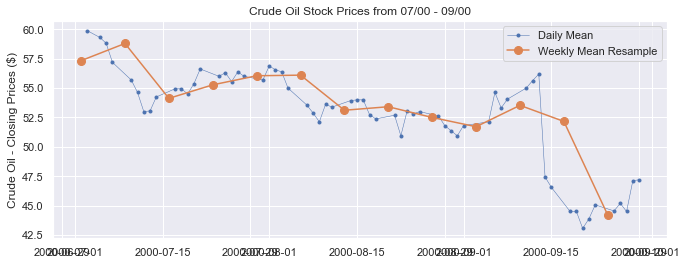

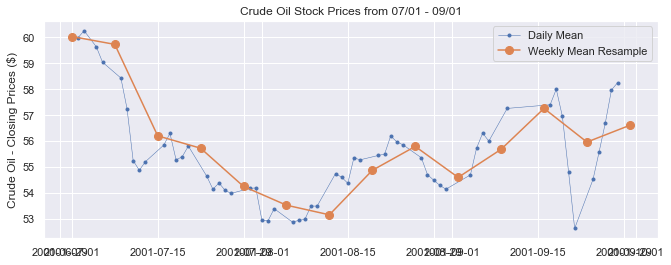

In [55]:
# Start and end of the date range to extract
start, end = '2000-07', '2000-09'

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()

ax.plot(df.loc[start:end, 'Close'],
        marker='.', linestyle='-', linewidth=0.5, label='Daily Mean')

ax.plot(df_weekly_mean.loc[start:end, 'Close'],
        marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

ax.set_ylabel('Crude Oil - Closing Prices ($)')
ax.set_title('Crude Oil Stock Prices from 07/00 - 09/00')
ax.legend();

#--------------------------------------------------------------------------------

# Start and end of the date range to extract
start, end = '2001-07', '2001-09'

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()

ax.plot(df.loc[start:end, 'Close'],
        marker='.', linestyle='-', linewidth=0.5, label='Daily Mean')

ax.plot(df_weekly_mean.loc[start:end, 'Close'],
        marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

ax.set_ylabel('Crude Oil - Closing Prices ($)')
ax.set_title('Crude Oil Stock Prices from 07/01 - 09/01')
ax.legend();

The weekly mean is smoother that the daily mean because of higher date frequency.

In [56]:
# Create a new dataframe centered on the 7-day rolling mean
df_7day = df[data_columns].rolling(7, center=True).mean()
df_7day.head(10)

,Open,Close,AdjClose,Volume
date,,,,
1998-01-02,NaN,NaN,NaN,NaN
1998-01-05,NaN,NaN,NaN,NaN
1998-01-06,NaN,NaN,NaN,NaN
1998-01-07,71.652857,71.047143,11.610571,1.043586e+06
1998-01-08,70.732857,70.297143,11.488000,1.150714e+06
1998-01-09,69.911429,69.520000,11.361000,1.280214e+06
1998-01-12,69.125714,69.127143,11.296800,1.307171e+06
1998-01-13,69.090000,68.992857,11.274857,1.301900e+06
1998-01-14,68.937143,69.180000,11.305443,1.282314e+06


#### Line Plot with Frequency, Resampling and Rolling Mean Functions - Crude Oil 07/2001 - 09/2001

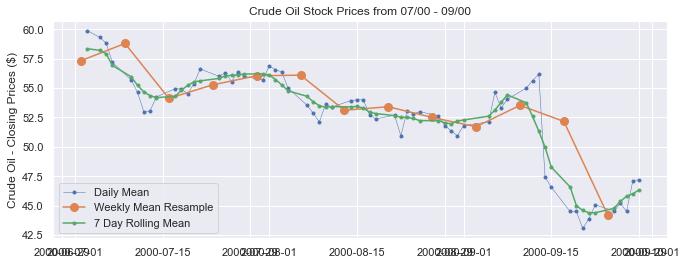

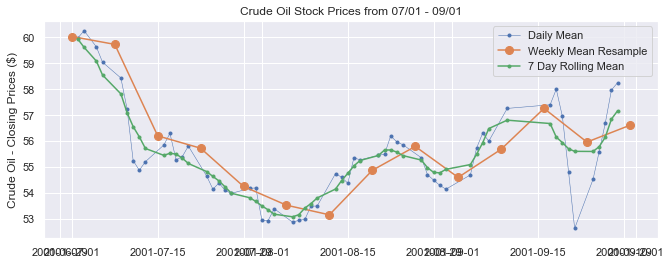

In [58]:
# Start and end of the date range to extract
start, end = '2000-07', '2000-09'

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()

ax.plot(df.loc[start:end, 'Close'],
        marker='.', linestyle='-', linewidth=0.5, label='Daily Mean')

ax.plot(df_weekly_mean.loc[start:end, 'Close'],
        marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

ax.plot(df_7day.loc[start:end, 'Close'],
        marker='.', linestyle='-', label='7 Day Rolling Mean')

ax.set_ylabel('Crude Oil - Closing Prices ($)')
ax.set_title('Crude Oil Stock Prices from 07/00 - 09/00')
ax.legend();

#-------------------------------------------------------------------------------

# Start and end of the date range to extract
start, end = '2001-07', '2001-09'

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()

ax.plot(df.loc[start:end, 'Close'],
        marker='.', linestyle='-', linewidth=0.5, label='Daily Mean')

ax.plot(df_weekly_mean.loc[start:end, 'Close'],
        marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

ax.plot(df_7day.loc[start:end, 'Close'],
        marker='.', linestyle='-', label='7 Day Rolling Mean')

ax.set_ylabel('Crude Oil - Closing Prices ($)')
ax.set_title('Crude Oil Stock Prices from 07/01 - 09/01')
ax.legend();

The trend line reveals that oil prices reached a sharp decline in the months prior to 9-11. And it remained flat for several years after.

In [21]:
# The min_periods=360 argument accounts for a few isolated missing days in the
# Open and AdjClose Prices time series

df_365d = df[data_columns].rolling(window=365, center=True, min_periods=360).mean()

#### Rolling Means Trends plot - Crude Oil 07/2001 - 09/2001

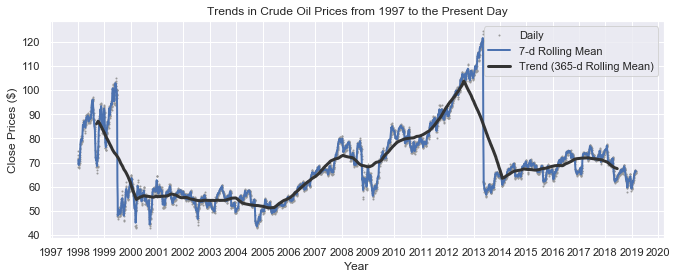

In [22]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()

ax.plot(df['Close'], marker='.', markersize=2, color='0.6',
        linestyle='None', label='Daily')

ax.plot(df_7d['Close'], linewidth=2, label='7-d Rolling Mean')

ax.plot(df_365d['Close'], color='0.2', linewidth=3,
        label='Trend (365-d Rolling Mean)')

# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Close Prices ($)')
ax.set_title('Trends in Crude Oil Prices from 1997 to the Present Day');

The trend line reveals that oil prices reached a sharp decline in the months prior to 9-11. And it remained flat for several years after.